In [16]:
import pandas as pd
import numpy as np
from pytrends.request import TrendReq
from pytrends import dailydata
import pandas_datareader as web
import matplotlib.pyplot as plt

BTC-USD:2022-09-01 2022-09-30
BTC-USD:2022-10-01 2022-10-31
BTC-USD:2022-11-01 2022-11-30
BTC-USD:2022-06-01 2022-06-30
BTC-USD:2022-07-01 2022-07-31
BTC-USD:2022-08-01 2022-08-31
BTC-USD:2022-03-01 2022-03-31
BTC-USD:2022-04-01 2022-04-30
BTC-USD:2022-05-01 2022-05-31
None


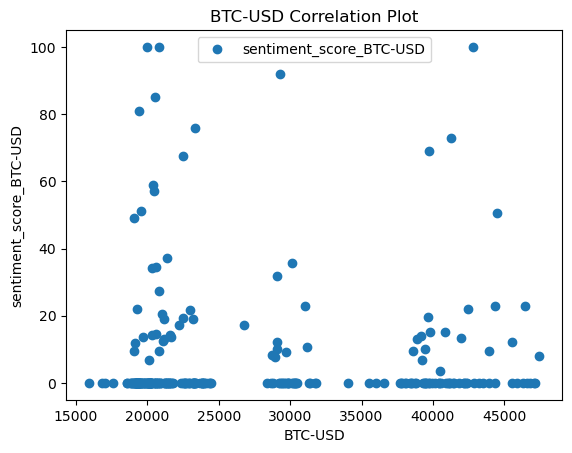

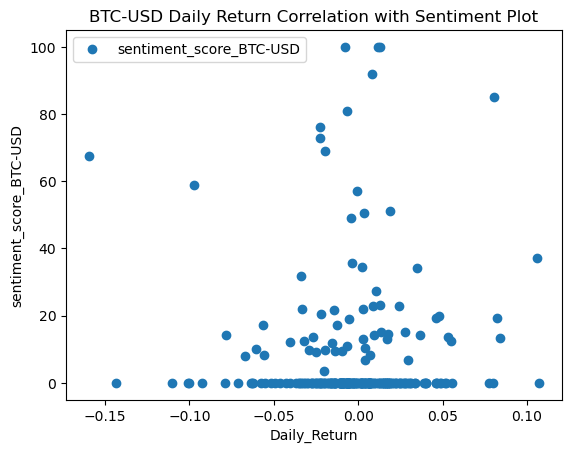

In [62]:
def generate_trends_analysis(key_word):

    trends1 = dailydata.get_daily_data(key_word, 2022, 9, 2022, 11, geo='US')
    trends2 = dailydata.get_daily_data(key_word, 2022, 6, 2022, 8, geo='US')
    trends3 = dailydata.get_daily_data(key_word, 2022, 3, 2022, 5, geo='US')


    trends_combined = pd.concat([trends1, trends2, trends3], axis='rows', join='inner')
    trends_combined.sort_index(ascending=True, inplace=True)
    trends_combined.drop(columns=[f'{key_word}_unscaled', f'{key_word}_monthly', 'isPartial', 'scale'], inplace=True)
    trends_combined.columns = [f'sentiment_score_{key_word}']

    # return trends_combined


    # Gets the historical abs value of the asset
    asset_historical_df = web.get_data_yahoo([key_word], '10/31/2017', interval='d')
    asset_historical_df = asset_historical_df.iloc[:, [0,1,2]]
    asset_historical_df = asset_historical_df['Close']
    asset_historical_df.columns = [' '.join(col).strip() for col in asset_historical_df.columns.values]

    # concat and plot correlation ABS
    absolute_price_correlation_df = pd.concat([asset_historical_df, trends_combined], axis="columns", join="inner")
    absolute_price_correlation_df.columns = [key_word, f'sentiment_score_{key_word}']
    
    # return absolute_price_correlation_df

    plot1 = absolute_price_correlation_df.plot(x=key_word, y=f'sentiment_score_{key_word}', style= 'o')
    plot2 = plt.xlabel(key_word)
    plot3 = plt.ylabel(f'sentiment_score_{key_word}')
    plt.title(f"{key_word} Correlation Plot")
    # return plot1


    # concat and plot correlation daily returns
    daily_return_correlation = absolute_price_correlation_df.copy()
    daily_return_correlation['Daily_Return'] = daily_return_correlation[key_word].pct_change()
    daily_return_correlation.drop(columns=[key_word], inplace=True)
    daily_return_correlation.dropna(inplace=True)
    plot4 = daily_return_correlation.plot(x='Daily_Return', y=f'sentiment_score_{key_word}', style= 'o')
    plot5 = plt.xlabel("Daily_Return")
    plot6 = plt.ylabel(f'sentiment_score_{key_word}')
    plt.title(f"{key_word} Daily Return Correlation with Sentiment Plot")



print(generate_trends_analysis("BTC-USD"))


In [64]:
# Just for testing. shorter version

def generate_trends_analysis2(key_word):

    trends1 = dailydata.get_daily_data(key_word, 2022, 9, 2022, 11, geo='US')
    # trends2 = dailydata.get_daily_data(key_word, 2022, 6, 2022, 8, geo='US')
    # trends3 = dailydata.get_daily_data(key_word, 2022, 3, 2022, 5, geo='US')


    trends_combined = pd.concat([trends1], axis='rows', join='inner')
    trends_combined.sort_index(ascending=True, inplace=True)
    trends_combined.drop(columns=[f'{key_word}_unscaled', f'{key_word}_monthly', 'isPartial', 'scale'], inplace=True)
    trends_combined.columns = [f'sentiment_score_{key_word}']

    # return trends_combined


    # Gets the historical abs value of the asset
    asset_historical_df = web.get_data_yahoo([key_word], '10/31/2017', interval='d')
    asset_historical_df = asset_historical_df.iloc[:, [0,1,2]]
    asset_historical_df = asset_historical_df['Close']
    asset_historical_df.columns = [' '.join(col).strip() for col in asset_historical_df.columns.values]

    # concat and plot correlation ABS
    absolute_price_correlation_df = pd.concat([asset_historical_df, trends_combined], axis="columns", join="inner")
    absolute_price_correlation_df.columns = [key_word, f'sentiment_score_{key_word}']
    
    # return absolute_price_correlation_df
    plot1 = absolute_price_correlation_df.plot(x=key_word, y=f'sentiment_score_{key_word}', style= 'o')
    plot2 = plt.xlabel(key_word)
    plot3 = plt.ylabel(f'sentiment_score_{key_word}')
    plt.title(f"{key_word} Absolute Value Correlation with Sentiment Plot")
    # return plot1


    # concat and plot correlation daily returns
    # Adds the pct_change()
    daily_return_correlation = absolute_price_correlation_df.copy()
    daily_return_correlation['Daily_Return'] = daily_return_correlation[key_word].pct_change()
    daily_return_correlation.drop(columns=[key_word], inplace=True)
    daily_return_correlation.dropna(inplace=True)
    plot4 = daily_return_correlation.plot(x='Daily_Return', y=f'sentiment_score_{key_word}', style= 'o')
    plot5 = plt.xlabel("Daily_Return")
    plot6 = plt.ylabel(f'sentiment_score_{key_word}')
    plt.title(f"{key_word} Daily Return Correlation with Sentiment Plot")

    # return daily_return_correlation





# print(generate_trends_analysis("BTC-USD"))

CL=F:2022-09-01 2022-09-30
CL=F:2022-10-01 2022-10-31
CL=F:2022-11-01 2022-11-30


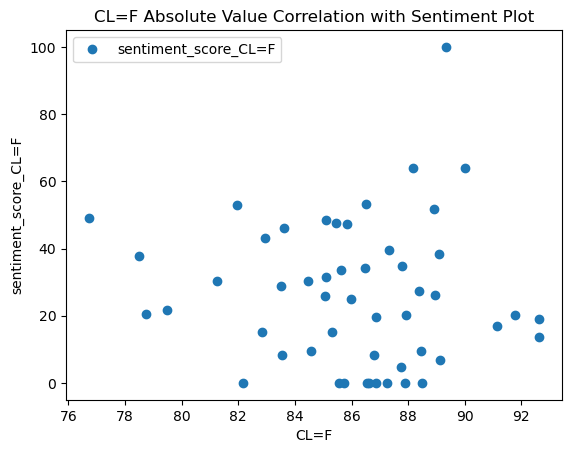

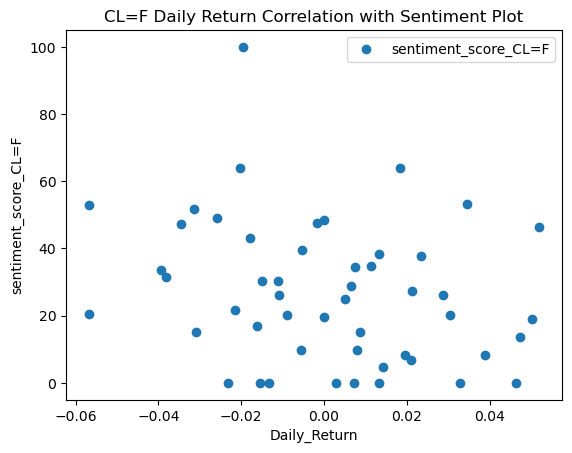

In [66]:
generate_trends_analysis2("CL=F")

SPY:2022-09-01 2022-09-30
SPY:2022-10-01 2022-10-31
SPY:2022-11-01 2022-11-30


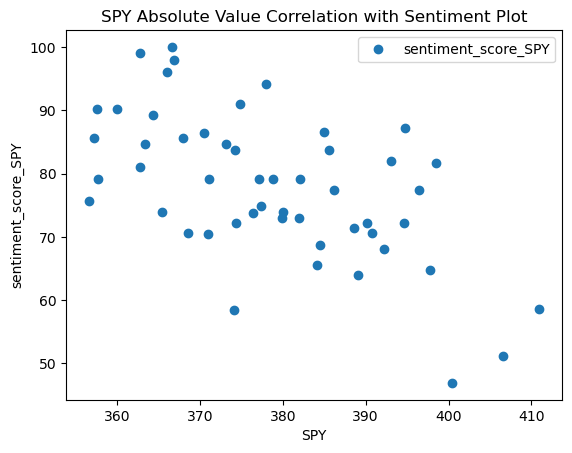

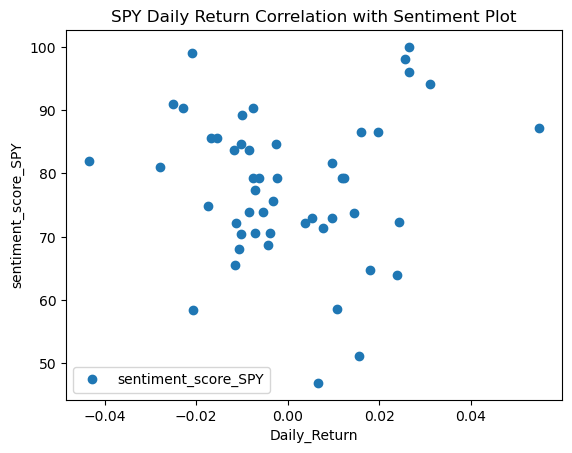

In [60]:
generate_trends_analysis("SPY")

^GSPC:2022-09-01 2022-09-30
^GSPC:2022-10-01 2022-10-31
^GSPC:2022-11-01 2022-11-30


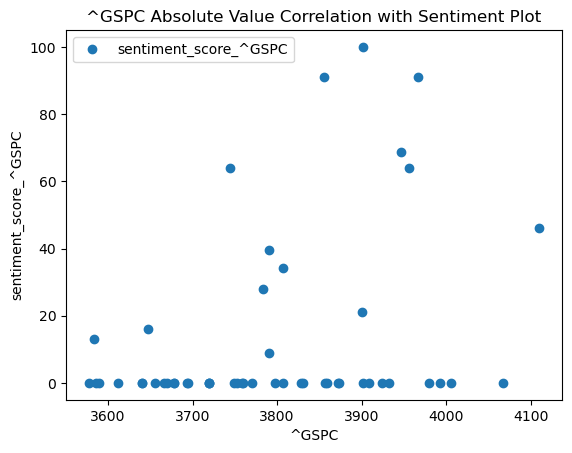

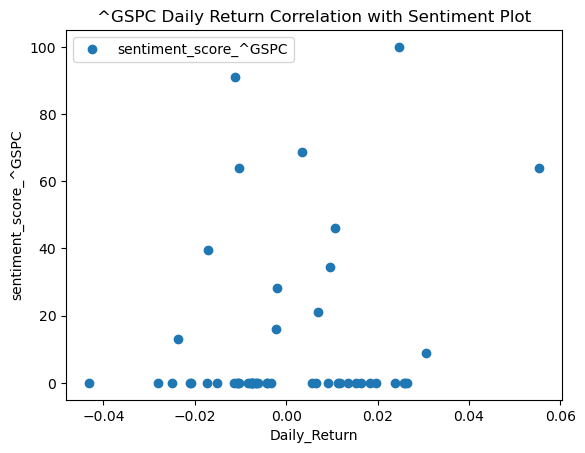

In [61]:
generate_trends_analysis('^GSPC')

BTC-USD:2022-09-01 2022-09-30
BTC-USD:2022-10-01 2022-10-31
BTC-USD:2022-11-01 2022-11-30
AxesSubplot(0.125,0.11;0.775x0.77)


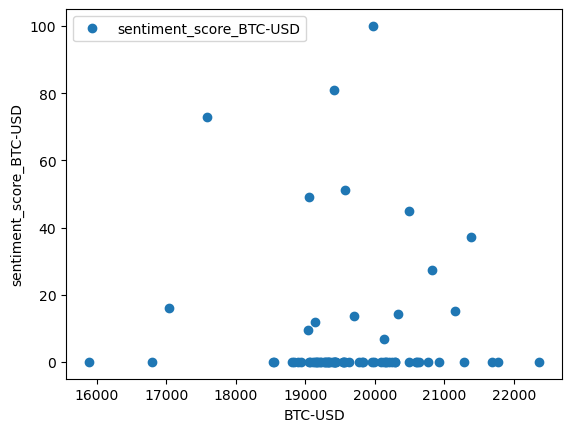

In [36]:
# # Just for testing. shorter version

def generate_trends_analysis(key_word):

    trends1 = dailydata.get_daily_data(key_word, 2022, 9, 2022, 11, geo='US')
    # trends2 = dailydata.get_daily_data(key_word, 2022, 6, 2022, 8, geo='US')
    # trends3 = dailydata.get_daily_data(key_word, 2022, 3, 2022, 5, geo='US')


    trends_combined = pd.concat([trends1], axis='rows', join='inner')
    trends_combined.sort_index(ascending=True, inplace=True)
    trends_combined.drop(columns=[f'{key_word}_unscaled', f'{key_word}_monthly', 'isPartial', 'scale'], inplace=True)
    trends_combined.columns = [key_word, f'sentiment_score_{key_word}']

    # return trends_combined


    # Gets the historical abs value of the asset
    asset_historical_df = web.get_data_yahoo([key_word], '10/31/2017', interval='d')
    asset_historical_df = asset_historical_df.iloc[:, [0,1,2]]
    asset_historical_df = asset_historical_df['Close']
    asset_historical_df.columns = [' '.join(col).strip() for col in asset_historical_df.columns.values]

    # concat and plot correlation ABS
    absolute_price_correlation_df = pd.concat([asset_historical_df, trends_combined], axis="columns", join="inner")
    # return absolute_price_correlation_df

    plot1 = absolute_price_correlation_df.plot(x=key_word, y='sentiment_score_BTC-USD', style= 'o')
    plot2 = plt.xlabel(key_word)
    plot3 = plt.ylabel(f'sentiment_score_{key_word}')
    # return plot.plt.show
    return plot1


    # concat and plot correlation daily returns



print(generate_trends_analysis("BTC-USD"))


In [40]:
# # Just for testing. shorter version

def generate_trends_analysis(key_word):

    trends1 = dailydata.get_daily_data(key_word, 2022, 9, 2022, 11, geo='US')
    # trends2 = dailydata.get_daily_data(key_word, 2022, 6, 2022, 8, geo='US')
    # trends3 = dailydata.get_daily_data(key_word, 2022, 3, 2022, 5, geo='US')


    trends_combined = pd.concat([trends1], axis='rows', join='inner')
    trends_combined.sort_index(ascending=True, inplace=True)
    trends_combined.drop(columns=[f'{key_word}_unscaled', f'{key_word}_monthly', 'isPartial', 'scale'], inplace=True)
    trends_combined.columns = [key_word, f'sentiment_score_{key_word}']

    # return trends_combined


    # Gets the historical abs value of the asset
    asset_historical_df = web.get_data_yahoo([key_word], '10/31/2017', interval='d')
    asset_historical_df = asset_historical_df.iloc[:, [0,1,2]]
    asset_historical_df = asset_historical_df['Close']
    asset_historical_df.columns = [' '.join(col).strip() for col in asset_historical_df.columns.values]

    # concat and plot correlation ABS
    absolute_price_correlation_df = pd.concat([asset_historical_df, trends_combined], axis="columns", join="inner")
    # return absolute_price_correlation_df

    plot1 = absolute_price_correlation_df.plot(x=key_word, y='sentiment_score_BTC-USD', style= 'o')
    plot2 = plt.xlabel(key_word)
    plot3 = plt.ylabel(f'sentiment_score_{key_word}')
    # return plot.plt.show
    return plot1


    # concat and plot correlation daily returns



print(generate_trends_analysis("BTC-USD"))

BTC-USD:2022-09-01 2022-09-30
BTC-USD:2022-10-01 2022-10-31
BTC-USD:2022-11-01 2022-11-30


ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements

In [29]:
def generate_trends_analysis(key_word):

    trends1 = dailydata.get_daily_data(key_word, 2022, 9, 2022, 11, geo='US')
    trends2 = dailydata.get_daily_data(key_word, 2022, 6, 2022, 8, geo='US')
    trends3 = dailydata.get_daily_data(key_word, 2022, 3, 2022, 5, geo='US')


    trends_combined = pd.concat([trends1, trends2, trends3], axis='rows', join='inner')
    trends_combined.sort_index(ascending=True, inplace=True)
    trends_combined.drop(columns=[f'{key_word}_unscaled', f'{key_word}_monthly', 'isPartial', 'scale'], inplace=True)
    # trends_combined.columns = [f'sentiment_score_{key_word}']

    # return trends_combined


    # Gets the historical abs value of the asset
    asset_historical_df = web.get_data_yahoo([key_word], '10/31/2017', interval='d')
    asset_historical_df = asset_historical_df.iloc[:, [0,1,2]]
    asset_historical_df = asset_historical_df['Close']
    asset_historical_df.columns = [' '.join(col).strip() for col in asset_historical_df.columns.values]

    # concat and plot correlation ABS
    absolute_price_correlation_df = pd.concat([asset_historical_df, trends_combined], axis="columns", join="inner")
    absolute_price_correlation_df.columns = [key_word, f"sentiment_score_{key_word}"]
    return absolute_price_correlation_df

    # absolute_price_correlation_df.plot(x=key_word, y=f'sentiment_score_{key_word}', style= 'o')
    # plt.xlabel(key_word)
    # plt.ylabel(f'sentiment_score_{key_word}')
    # return plt.show


    # concat and plot correlation daily returns



print(generate_trends_analysis("BTC-USD"))

BTC-USD:2022-09-01 2022-09-30
BTC-USD:2022-10-01 2022-10-31
BTC-USD:2022-11-01 2022-11-30
BTC-USD:2022-06-01 2022-06-30
BTC-USD:2022-07-01 2022-07-31
BTC-USD:2022-08-01 2022-08-31
BTC-USD:2022-03-01 2022-03-31
BTC-USD:2022-04-01 2022-04-30
BTC-USD:2022-05-01 2022-05-31
            B T C - U S D  sentiment_score_BTC-USD
2022-03-01   44354.636719                     0.00
2022-03-02   43924.117188                     9.36
2022-03-03   42451.789062                    22.00
2022-03-04   39137.605469                    14.08
2022-03-05   39400.585938                     0.00
...                   ...                      ...
2022-11-08   18541.271484                     0.00
2022-11-09   15880.780273                     0.00
2022-11-10   17586.771484                    73.00
2022-11-11   17034.292969                    15.98
2022-11-12   16799.185547                     0.00

[257 rows x 2 columns]


In [15]:
asset_historical_df = web.get_data_yahoo(["BTC-USD"], '10/31/2017', interval='d')
asset_historical_df = asset_historical_df.iloc[:, [0,1,2]]
asset_historical_df = asset_historical_df['Close']
# asset_historical_df.drop(columns=['Ad'])
asset_historical_df

Attributes,Adj Close,Close,High
Symbols,BTC-USD,BTC-USD,BTC-USD
Date,,,
2017-10-31,6468.399902,6468.399902,6470.430176
2017-11-01,6767.310059,6767.310059,6767.310059
2017-11-02,7078.500000,7078.500000,7367.330078
2017-11-03,7207.759766,7207.759766,7461.290039
2017-11-04,7379.950195,7379.950195,7492.859863
...,...,...,...
2022-11-11,17034.292969,17034.292969,17650.943359
2022-11-12,16799.185547,16799.185547,17066.675781


In [ ]:
absolute_price_correlation_df.plot(x=key_word, y= 'sentiment_score_{key_word}', style= 'o')
plt.xlabel (key_word)
plt.ylabel ('sentiment_score_WTI')
plt.show